In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR

In [49]:
dataset = pd.read_csv("insurance.csv")
df = dataset.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<Axes: title={'center': 'Children Count'}, xlabel='Children', ylabel='Count'>

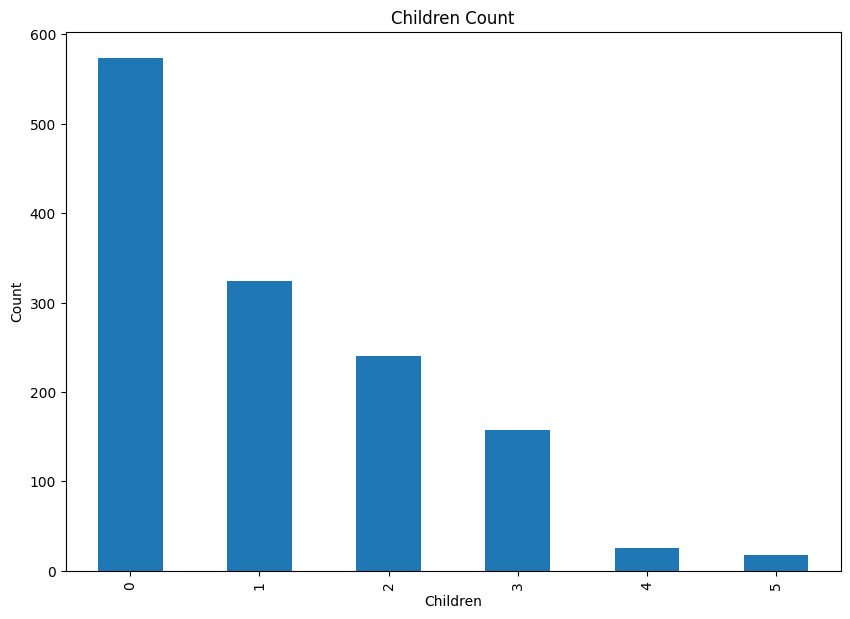

In [53]:
plt.figure(figsize=(10,7))
plt.title("Children Count")
plt.xlabel("Children")
plt.ylabel("Count")
df["children"].value_counts().plot.bar()

<Axes: >

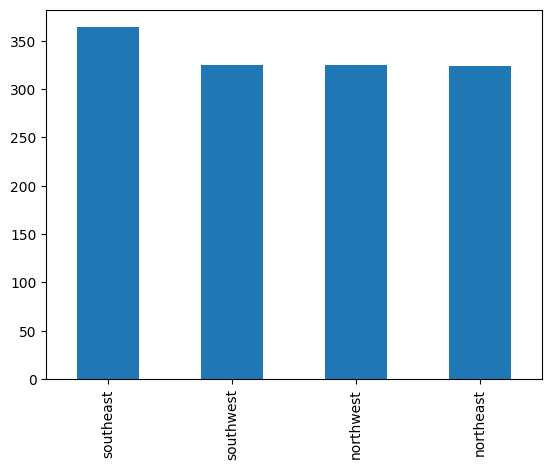

In [54]:
df["region"].value_counts().plot.bar()

In [55]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

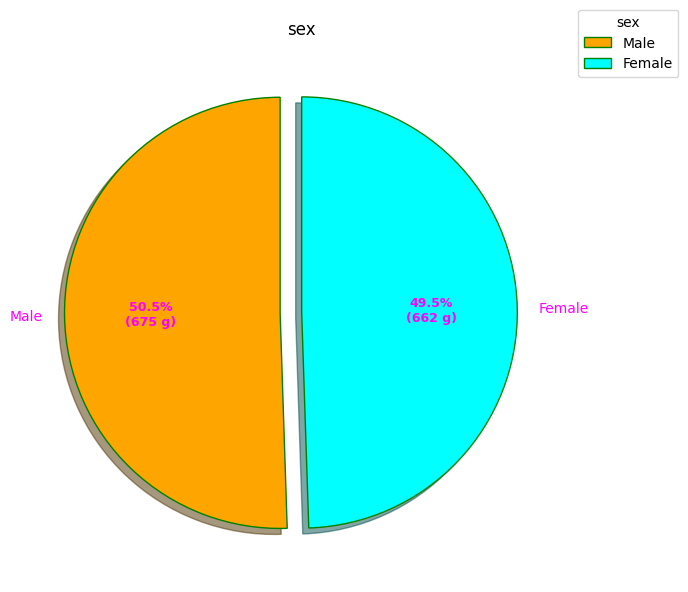

In [56]:
fig, ax = plt.subplots(figsize=(10,7))
sex = ['Male', "Female"]
data = list(df["sex"].value_counts().values)

explode = (0.1, 0.0)

colors= ("orange", "cyan")

wp = {
    "linewidth": 1,
    "edgecolor": "green"
}

def func(pct, allvalues):
  absolute = int(pct / 100 * np.sum(allvalues))
  return "{:.1f}%\n({:d} g)".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                    autopct = lambda pct: func(pct, data),
                                    explode = explode,
                                    labels = sex,
                                    shadow = True,
                                    colors = colors,
                                    startangle = 90,
                                    wedgeprops = wp,
                                    textprops = dict(color="magenta"))

ax.legend(wedges, sex,
          title="sex",
          loc="center left",
          bbox_to_anchor=(1, 0.5, 0.5, 1))

plt.setp(autotexts, size=9, weight="bold")
ax.set_title("sex")

plt.show()

<Axes: xlabel='region', ylabel='bmi'>

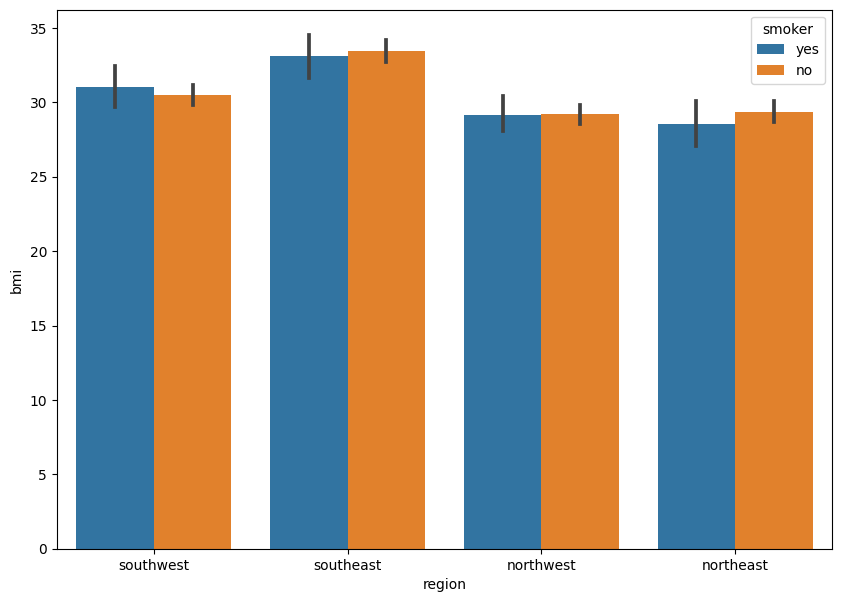

In [57]:
plt.figure(figsize=(10,7))

sns.barplot(x="region", y="bmi", hue="smoker", data=df)

In [58]:
# label encoding
def label_encoding(column_name):
  label_encoder = LabelEncoder()
  df[column_name] = label_encoder.fit_transform(df[column_name])

In [59]:
label_encoding("smoker")
label_encoding("sex")

In [60]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [61]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [62]:
#one-hot encoding

one_hot = pd.get_dummies(df["region"])
one_hot.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [63]:
df = pd.concat([df, one_hot], axis=1)
df.drop("region", axis=1, inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   uint8  
 7   northwest  1338 non-null   uint8  
 8   southeast  1338 non-null   uint8  
 9   southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [65]:
X = df.drop("charges", axis=1)
y = df["charges"]

In [66]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0:5]

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.32608696, 1.        , 0.18146355, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.30434783, 1.        , 0.34759214, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [68]:
X_train.shape

(1070, 9)

In [69]:
y_train.shape

(1070,)

In [70]:
X_test.shape

(268, 9)

In [71]:
y_test.shape

(268,)

In [72]:
# model selection

linreg = LinearRegression()
DecTree = DecisionTreeRegressor()
Rand_forest = RandomForestRegressor()
SVM = SVR()

In [73]:
linreg_scores = cross_val_score(linreg,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [74]:
linreg_scores

array([-36875998.62836598, -43307871.90469339, -27392943.335941  ,
       -36545076.53517248, -34064321.21101744, -37545462.85261904,
       -52992268.32309429, -39706839.29685257, -38357145.09175086,
       -32042446.75311643])

In [75]:
DecTree_scores = cross_val_score(DecTree,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [76]:
Rand_forest_scores = cross_val_score(Rand_forest,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [77]:
svm_scores = cross_val_score(SVM,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [78]:
def score_display(scores):
  scores = np.sqrt(-scores)
  print(f"""
  RMSE Scores:{scores},
  Mean: {scores.mean()},
  Standart Deviation: {scores.std()}
  """)

In [79]:
score_display(linreg_scores)


  RMSE Scores:[6072.56112595 6580.87166754 5233.82683473 6045.25239632 5836.4647871
 6127.43525895 7279.57885616 6301.33631041 6193.3145481  5660.60480453],
  Mean: 6133.124658979258,
  Standart Deviation: 517.5126188634559
  


In [80]:
score_display(DecTree_scores)


  RMSE Scores:[5924.85836368 6769.45191236 7132.8307664  7248.05359937 7367.83431158
 6314.42631042 7060.94985988 7132.50291189 6610.87159631 5271.72032516],
  Mean: 6683.349995707057,
  Standart Deviation: 636.4386166819276
  


In [81]:
params = {"n_estimators": [3, 10, 20, 50],
          "n_jobs": [2, 3, 4, 10]}

In [82]:
grid_s = GridSearchCV(Rand_forest, params, cv=5, scoring="neg_mean_squared_error")

In [83]:
grid_s.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [3, 10, 20, 50],
                         'n_jobs': [2, 3, 4, 10]},
             scoring='neg_mean_squared_error')

In [84]:
grid_s.best_params_

{'n_estimators': 50, 'n_jobs': 10}

In [85]:
for mean_score, params in zip((grid_s.cv_results_['mean_test_score']), grid_s.cv_results_["params"]):
  print(np.sqrt(-mean_score), "------------", params)

5692.21182551146 ------------ {'n_estimators': 3, 'n_jobs': 2}
5675.796237699094 ------------ {'n_estimators': 3, 'n_jobs': 3}
5672.217955395643 ------------ {'n_estimators': 3, 'n_jobs': 4}
5699.373221510956 ------------ {'n_estimators': 3, 'n_jobs': 10}
5095.543444961737 ------------ {'n_estimators': 10, 'n_jobs': 2}
5106.8495994715295 ------------ {'n_estimators': 10, 'n_jobs': 3}
5156.221343430683 ------------ {'n_estimators': 10, 'n_jobs': 4}
5148.854610215864 ------------ {'n_estimators': 10, 'n_jobs': 10}
5029.029927216189 ------------ {'n_estimators': 20, 'n_jobs': 2}
5009.324823046285 ------------ {'n_estimators': 20, 'n_jobs': 3}
5009.564332860122 ------------ {'n_estimators': 20, 'n_jobs': 4}
5017.919497130887 ------------ {'n_estimators': 20, 'n_jobs': 10}
4957.519158526065 ------------ {'n_estimators': 50, 'n_jobs': 2}
4992.351930762548 ------------ {'n_estimators': 50, 'n_jobs': 3}
4964.142181535496 ------------ {'n_estimators': 50, 'n_jobs': 4}
4949.869701946108 --------

In [86]:
prediction = grid_s.best_estimator_.predict(X_test)

In [87]:
y_test[0:10].values

array([ 9095.06825,  5272.1758 , 29330.98315,  9301.89355, 33750.2918 ,
        4536.259  ,  2117.33885, 14210.53595,  3732.6251 , 10264.4421 ])

In [88]:
comparison = pd.DataFrame({"Y Test": y_test[0:10].values,
                         "Predictions": prediction[0:10]})

In [89]:
comparison

,Y Test,Predictions
0,9095.06825,9498.265464
1,5272.17580,5376.525399
2,29330.98315,28361.138915
3,9301.89355,10836.666380
4,33750.29180,34847.463405
5,4536.25900,9218.082020
6,2117.33885,2073.205483
7,14210.53595,14207.087567
8,3732.62510,6680.506203
9,10264.44210,11560.675558


In [90]:
def regression_evaluation(preds):
  mse = mean_squared_error(y_test, preds)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_test, preds)
  mae = mean_absolute_error(y_test, preds)

  print(f"Mean Absolute Error: {mae} \nMean Squared Error: {mse} \nRoot Mean Squared Error: {rmse} \nR-Squared Value: {r_squared}")

In [91]:
regression_evaluation(prediction)

Mean Absolute Error: 2535.9719885819645 
Mean Squared Error: 21727717.70202729 
Root Mean Squared Error: 4661.300001290122 
R-Squared Value: 0.8600457633808194


In [92]:
from scipy import stats

confidence = 0.95

squared_errors = (prediction - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([3716.03398967, 5444.86242174])